Code version
* Date Created: 24-03-2021
* Main Author: Najih Shabir
* Colaborators: Awmnah Asad, Ersegun Kocoglu, Najih Shabir, Ricardo Luhm

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from time import time
from statistics import mean
import scipy.linalg
import sympy as sp


In [ ]:
def get_time(fun, args=(), kwargs={}):
    '''
    Measures execution time for a given function
    '''
    start = time()
    res = fun(*args, **kwargs)
    return time() - start, res

In [ ]:
def simulation(start=100, end=1000, step=100, n=None, k=10):
    '''
    Function that will generate matrix with fixed n (width) if it's not `None`
    and growing m or generate matrix with growing n (width) and m*k (length).
    Then it will compute pseudo inverse, QR decomposition and QR pseudo inverse.
    '''
    # dictionary with list for every time
    time_dict = {'generation': [], 'A_psinv': [], 'qr decomposition': [],
                 'A_qrpsinv': []}

    # lambda function for every operation that we do

    # this you create each function, but they do not have any values inside them
    generate= lambda m, n: np.random.randn(m, n) if n else np.random.randn(k*m, m)
    A_psinv= lambda A: np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
    qr_decomposition= lambda A: np.linalg.qr(A)
    A_qrpsinv= lambda Q, R: np.dot(np.linalg.inv(R), Q.T)
    
    # length is a vector of size values 
    #ranging from start to end adding the step value for each iteration
    ### example: start = 10, end = 100, step = 10
    length = np.arange(start, end, step)

    for i in length:
        # matrix generation
        # inputs: func:generate.
        # for that generate you will use "i" size of the matrix
        # i = 10 or 20 or 30 and n = 1000

        #generation_time, A = get_time(generate, (i, n)) old
        generation_time, A = get_time(generate, (i, i)) #new

        # compute pseudoinverse
        A_psinv_time, _ = get_time(A_psinv, (A,))

        # compute qr decomposition
        qr_decomposition_time, qr = get_time(qr_decomposition, (A,))
        Q, R = qr

        # compute A_qrpsinv
        A_qrpsinv_time, _ = get_time(A_qrpsinv, (Q, R))

        # save time
        time_dict['generation'].append(generation_time)
        time_dict['A_psinv'].append(A_psinv_time)
        time_dict['qr decomposition'].append(qr_decomposition_time)
        time_dict['A_qrpsinv'].append(A_qrpsinv_time)

    return length, time_dict

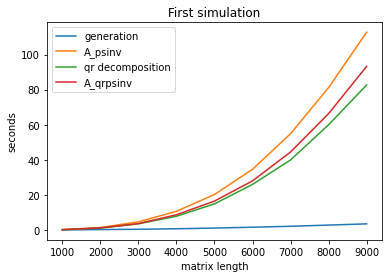

In [ ]:
length, times = simulation(start=1000, end=10000, step=1000, n=1000)

for k, v in times.items():
    plt.plot(length, v, label=k)

plt.title('First simulation')
plt.xlabel('matrix length')
plt.ylabel('seconds')
plt.legend()
plt.show()

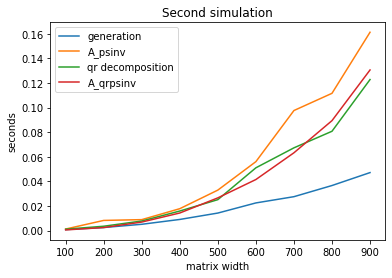

In [ ]:
length, times = simulation()

for k, v in times.items():
    plt.plot(length, v, label=k)

plt.title('Second simulation')
plt.xlabel('matrix width')
plt.ylabel('seconds')
plt.legend()
plt.show()

In [ ]:
generate= lambda m, n: np.random.randn(m, n) if n else np.random.randn(k*m, m)
A_psinv= lambda A: np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
qr_decomposition= lambda A: np.linalg.qr(A)
A_qrpsinv= lambda Q, R: np.dot(np.linalg.inv(R), Q.T)

In [ ]:
i = 10
generation_time, A = get_time(generate, (i, i))

In [ ]:
print(A.shape)
print(type(A))
sp.Matrix(A)

(10, 10)
<class 'numpy.ndarray'>


Matrix([
[  0.365773773180024,   0.971999919084899,    1.2332214693232,  0.418675897305756, -0.0031035215993321,  -1.54788669719294,   -1.84717686010667,  0.197104968067536, -0.558406911937796, 0.0201384148958302],
[  -0.39315744199368,  -0.789886805678561, 0.0807529288966245,  -0.19839497852129,    1.21451295629919,  -2.95814738037652,   0.494841798247362, -0.473901843406463, -0.431133409734948,   1.44229698572834],
[ -0.615161190645159,  -0.686840007392744,  0.489121991981858,    1.5051344265325,  -0.469374292624634,    0.7944075590545,   -1.06772509072752, 0.0267563489542026,  0.651585989699849, -0.584334396445942],
[  -1.55468019332873, -0.0871212617994487,  -1.23735245849932, -0.378840370064281,  -0.105990474169774,  -1.38403659066095,    1.30405668520267,   0.59928138986186,  -1.04048994509015,  0.279738050695935],
[  0.333630077892966,   0.480494214926071,  0.272367636413733, -0.695405866825936,  -0.324420511341661, -0.121708633777089,  -0.229369790595638,  0.122002403945466,  -

In [ ]:
# compute pseudoinverse
_, A_psinv_output = get_time(A_psinv, (A,))
print(A_psinv_output.shape)
print(type(A_psinv_output))
sp.Matrix(A_psinv_output)

(10, 10)
<class 'numpy.ndarray'>


Matrix([
[ -1.71578150755256,  -0.54028486318692,   1.09856387575253,  -0.296886070353043,   3.27524369602291,  -0.618727022565136,  0.418170982304032,   1.84832371954809,  0.671066784048134,     2.2343384705605],
[ 0.907083385152425, 0.0459032630143066, -0.825357215506148,  0.0256592953456401,   -1.3755374037534,  0.0817437865836723, -0.201907316974872, -0.712521471258548, -0.149230606749949,  -0.829620408658146],
[  1.11622307606808,   0.34260435011028, -0.885128527846585,  -0.145065331246187,  -1.99755607756397,   0.509419047397121, -0.341639408977076, -0.976633459975109, -0.403177517438939,   -1.42804204797791],
[-0.861451300290885, -0.263486489139321,  0.848390414135956,  0.0190957241195678,   1.56804585612805,  -0.432519121991125, 0.0714050775243924,   1.08323062932649,  0.330628101827702,    1.12759213026768],
[  1.33481861932708,  0.303068712676273,  -1.41928274454474,  0.0210686459374278,  -3.03552156160161,   0.489987410192033, -0.294051817793708,  -1.06036172946722,  -0.6415

In [ ]:
# compute qr decomposition
qr_decomposition_time, qr = get_time(qr_decomposition, (A,))
Q, R = qr

In [ ]:
# compute A_qrpsinv
_, A_qrpsinv_output = get_time(A_qrpsinv, (Q, R))
print(A_qrpsinv_output.shape)
print(type(A_qrpsinv_output))
sp.Matrix(A_qrpsinv_output)

(10, 10)
<class 'numpy.ndarray'>


Matrix([
[ -1.71578150755257,  -0.54028486318692,   1.09856387575258,  -0.296886070353014,   3.27524369602292,  -0.618727022565156,   0.41817098230404,    1.8483237195481,  0.671066784048126,    2.23433847056051],
[ 0.907083385152431, 0.0459032630143104, -0.825357215506163,  0.0256592953456278,  -1.37553740375341,  0.0817437865836848, -0.201907316974875,  -0.71252147125855, -0.149230606749949,  -0.829620408658153],
[  1.11622307606809,  0.342604350110287, -0.885128527846605,  -0.145065331246197,  -1.99755607756398,   0.509419047397139, -0.341639408977081, -0.976633459975117,  -0.40317751743893,   -1.42804204797792],
[-0.861451300290891, -0.263486489139326,  0.848390414135972,  0.0190957241195816,   1.56804585612806,  -0.432519121991143, 0.0714050775243953,    1.0832306293265,  0.330628101827704,    1.12759213026769],
[  1.33481861932709,  0.303068712676284,  -1.41928274454477,  0.0210686459374056,  -3.03552156160163,   0.489987410192056, -0.294051817793713,  -1.06036172946722, -0.64154

In [ ]:
A_output = A_psinv_output - A_qrpsinv_output
print(A_output.shape)
print(type(A_output))
sp.Matrix(A_output)

(10, 10)
<class 'numpy.ndarray'>


Matrix([
[ 1.22124532708767e-14, -4.44089209850063e-16, -4.10782519111308e-14, -2.87547763377916e-14, -1.02140518265514e-14,  2.04281036531029e-14, -7.60502771868232e-15, -1.11022302462516e-14,  7.99360577730113e-15,  -1.4210854715202e-14],
[-6.21724893790088e-15, -3.79557496543725e-15,  1.48769885299771e-14,  1.22263310586845e-14,  8.65973959207622e-15, -1.25593979660721e-14,   3.7470027081099e-15,   2.1094237467878e-15, -2.77555756156289e-16,  6.99440505513849e-15],
[-6.43929354282591e-15, -6.77236045021345e-15,  2.03170813506404e-14,  1.04360964314765e-14,  1.08801856413265e-14, -1.85407245112401e-14,  4.05231403988182e-15,  7.32747196252603e-15, -8.99280649946377e-15,  6.88338275267597e-15],
[ 6.21724893790088e-15,   4.9960036108132e-15, -1.66533453693773e-14, -1.37806432931598e-14, -1.06581410364015e-14,  1.79301018476963e-14, -2.85882428840978e-15,  -3.5527136788005e-15, -1.77635683940025e-15, -1.02140518265514e-14],
[-9.76996261670138e-15,  -1.0991207943789e-14,  3.1530333899354

In [ ]:
A_output_abs = abs(A_output)
print(A_output_abs.shape)
print(type(A_output_abs))
sp.Matrix(A_output_abs)

(10, 10)
<class 'numpy.ndarray'>


Matrix([
[1.22124532708767e-14, 4.44089209850063e-16, 4.10782519111308e-14, 2.87547763377916e-14, 1.02140518265514e-14, 2.04281036531029e-14, 7.60502771868232e-15, 1.11022302462516e-14, 7.99360577730113e-15,  1.4210854715202e-14],
[6.21724893790088e-15, 3.79557496543725e-15, 1.48769885299771e-14, 1.22263310586845e-14, 8.65973959207622e-15, 1.25593979660721e-14,  3.7470027081099e-15,  2.1094237467878e-15, 2.77555756156289e-16, 6.99440505513849e-15],
[6.43929354282591e-15, 6.77236045021345e-15, 2.03170813506404e-14, 1.04360964314765e-14, 1.08801856413265e-14, 1.85407245112401e-14, 4.05231403988182e-15, 7.32747196252603e-15, 8.99280649946377e-15, 6.88338275267597e-15],
[6.21724893790088e-15,  4.9960036108132e-15, 1.66533453693773e-14, 1.37806432931598e-14, 1.06581410364015e-14, 1.79301018476963e-14, 2.85882428840978e-15,  3.5527136788005e-15, 1.77635683940025e-15, 1.02140518265514e-14],
[9.76996261670138e-15,  1.0991207943789e-14, 3.15303338993544e-14, 2.22495633028785e-14, 1.465494392505

In [ ]:
delta_psinv = np.array(A_output_abs.mean()).reshape((1,1)) ### y_axis value
print(delta_psinv)
print(type(delta_psinv))
print(delta_psinv.shape)
sp.Matrix(delta_psinv)

[[6.95967589e-15]]
<class 'numpy.ndarray'>
(1, 1)


Matrix([[6.95967589114943e-15]])

In [ ]:
def najih_function(start = 10, end = 100, step = 10 ):
  ### creating lambda functions 
  generate= lambda m, n: np.random.randn(m, n) if n else np.random.randn(k*m, m)
  A_psinv= lambda A: np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
  qr_decomposition= lambda A: np.linalg.qr(A)
  A_qrpsinv= lambda Q, R: np.dot(np.linalg.inv(R), Q.T)


  # length is a vector of size values 
  #ranging from start to end adding the step value for each iteration
  ### example: start = 10, end = 100, step = 10
  range_length = np.arange(start, end, step)

  all_plot_outputs = []

  for row in range_length:
    columns = row
    # needed for plot - >row
    _, A = get_time(generate, (row, columns))
    # print(A.shape)
    # print(type(A))
    # sp.Matrix(A)

    # compute pseudoinverse
    _, A_psinv_output = get_time(A_psinv, (A,))
    # print(A_psinv_output.shape)
    # print(type(A_psinv_output))
    # sp.Matrix(A_psinv_output)

    # compute qr decomposition
    _, qr = get_time(qr_decomposition, (A,))
    Q, R = qr

    _, A_qrpsinv_output = get_time(A_qrpsinv, (Q, R))
    # print(A_qrpsinv_output.shape)
    # print(type(A_qrpsinv_output))
    # sp.Matrix(A_qrpsinv_output)

    A_output = A_psinv_output - A_qrpsinv_output
    A_output_abs = abs(A_output)
    #delta_psinv = np.array(A_output_abs.mean()).reshape((1,1)) ### for visualization only with sympy
    delta_psinv = A_output_abs.mean() ## needed for plot
    output_pair = [row, delta_psinv] ### plot [x,y]
    all_plot_outputs.append(output_pair)
  return all_plot_outputs


In [ ]:
def najihs_plot (all_plot_outputs):
  ### plot delta_psinv by n
  array = np.array(all_plot_outputs)

  plt.plot( array[:,0], array[:,1] )

  plt.title('delta_psinv by n')
  plt.xlabel('n')
  plt.ylabel('delta_psinv')
  plt.legend()
  plt.show()


In [ ]:
outputs = najih_function(start=100, end=1000, step=100)

No handles with labels found to put in legend.


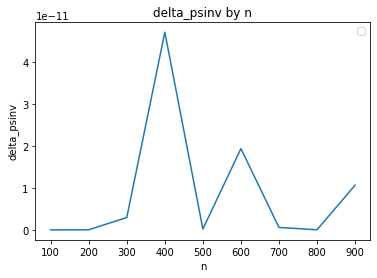

In [ ]:
najihs_plot(outputs)